# Q1 - Counting Frequencies in a List

2 : 4
4 : 5
6 : 6
8 : 3
5 : 2
1 : 3
9 : 5
0 : 2
7 : 4
3 : 5
10 : 3


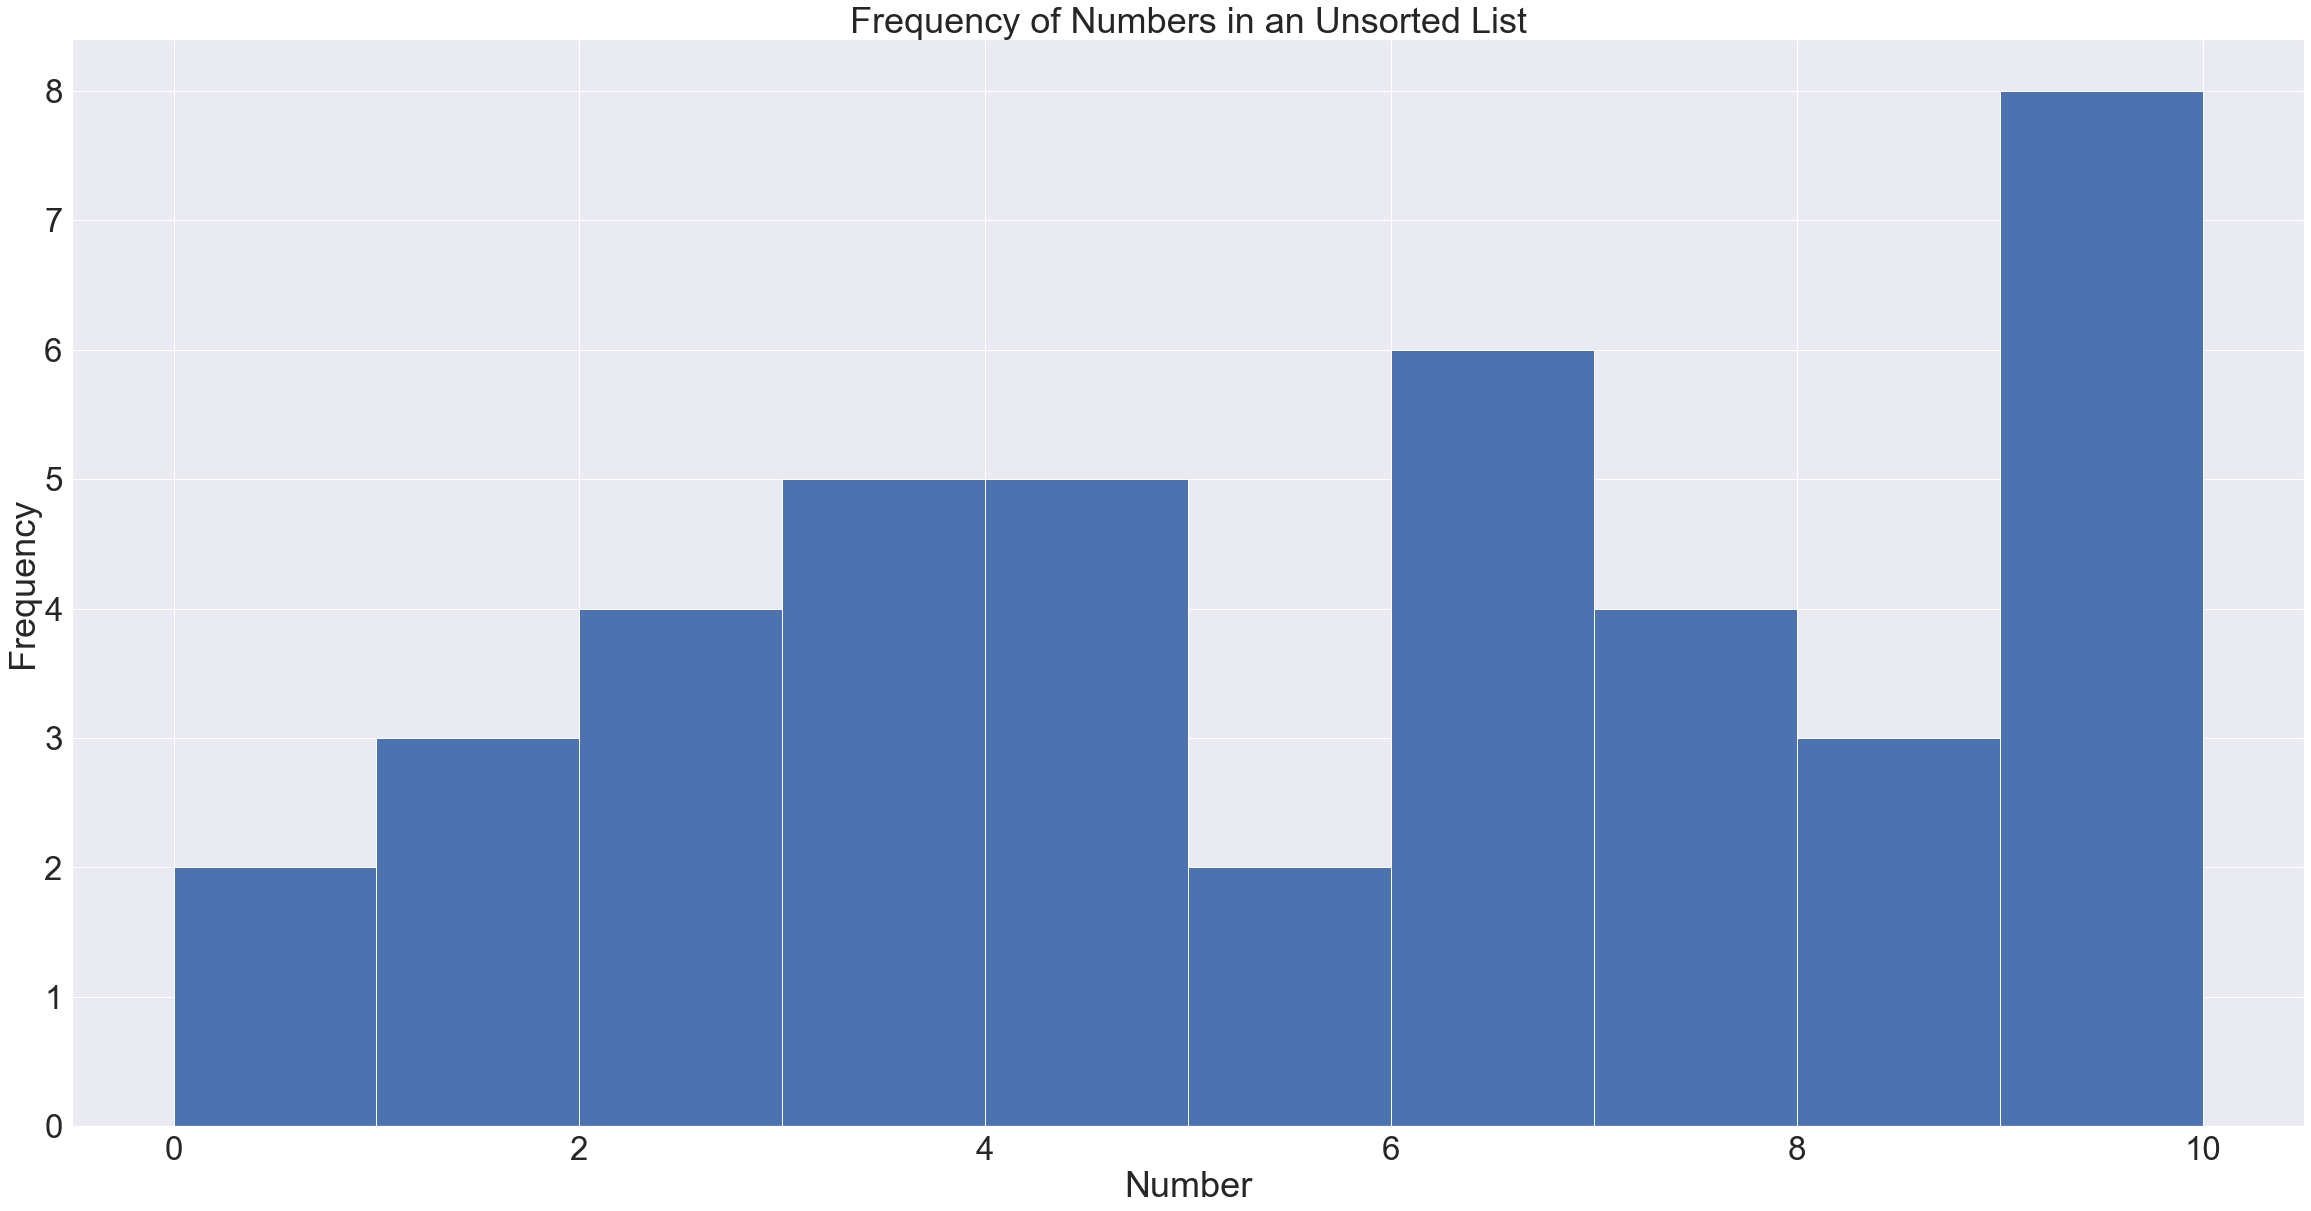

In [11]:
import json
import matplotlib.pyplot as plt

# Find the frequency of each distinct element in the list using a dictionary.
ulist = [2,4,6,8,4,5,2,1,9,0,4,6,7,4,3,2,1,9,10,3,7,9,6,0,1,3,5,6,7,8,9,10,2,3,6,8,9,10,6,7,4,3]
frequency = {}
for values in ulist:
    frequency[values] = ulist.count(values)
for key, values in frequency.items():
    print(key, ':', values)
    
# Plot the frequency results, e.g. using bar chart.
plt.hist(ulist)

plt.xlabel("Number")
plt.ylabel("Frequency")

plt.title("Frequency of Numbers in an Unsorted List")

plt.show()

# Store this dictionary results into json file.
with open('dictionaryresults.json', 'w') as file:
    json.dump(frequency, file, sort_keys=True, indent=1)

# Q2 - Do You Post Too Much?

In [3]:
import pandas as pd

# Read json file in DataFrame
df = pd.read_json('/Users/KaylaJane/Desktop/junior S2/computing /midterm project/your_posts_1.json')

df.head(3)

,timestamp,data,title,attachments,tags
0,2021-03-20 17:08:31,[{'post': 'Happy birthday sophia!!'}],Kayla Albano wrote on Sophia Prud'homme's time...,NaN,NaN
1,2021-03-15 22:17:36,[{'post': 'You donât want to miss this! Here...,NaN,[{'data': [{'media': {'uri': 'photos_and_video...,NaN
2,2021-03-06 18:15:18,[{'post': 'Hi Everyone! As many of you know I ...,NaN,[{'data': [{'media': {'uri': 'photos_and_video...,NaN


In [4]:
import pandas as pd

# Reformatting Data to be Usable

# Read json file in DataFrame
df = pd.read_json('/Users/KaylaJane/Desktop/junior S2/computing /midterm project/your_posts_1.json')

# Renaming "timestamp" to "date"
df.rename(columns={'timestamp': 'date'}, inplace=True)

# Removing Unnecessary Columns
df = df.drop(['attachments', 'title', 'tags'], axis=1)

# Formatting to Correct "datetime"
pd.to_datetime(df['date'])

df.head(3)

print(df.shape)
df.tail(3)   # Checking End of Data

(110, 2)


,date,data
107,2018-04-20 02:46:37,[{'post': 'happy bday Remy!! I miss u!'}]
108,2018-03-24 14:10:58,[{'post': 'ESPN spring training soon! Go Mille...
109,2018-03-21 00:15:47,[{'post': 'this is my dress'}]


In [5]:
df = df.set_index('date')
post_counts = df['data'].resample('MS').size()
post_counts

date
2018-03-01     2
2018-04-01     4
2018-05-01     5
2018-06-01     0
2018-07-01     0
2018-08-01     1
2018-09-01    11
2018-10-01     7
2018-11-01     8
2018-12-01     5
2019-01-01     9
2019-02-01     2
2019-03-01     7
2019-04-01     4
2019-05-01     7
2019-06-01     2
2019-07-01     0
2019-08-01     1
2019-09-01     0
2019-10-01    10
2019-11-01     2
2019-12-01     1
2020-01-01     3
2020-02-01     3
2020-03-01     2
2020-04-01     2
2020-05-01     4
2020-06-01     0
2020-07-01     0
2020-08-01     0
2020-09-01     0
2020-10-01     0
2020-11-01     0
2020-12-01     1
2021-01-01     2
2021-02-01     1
2021-03-01     4
Freq: MS, Name: data, dtype: int64

/Users/KaylaJane/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


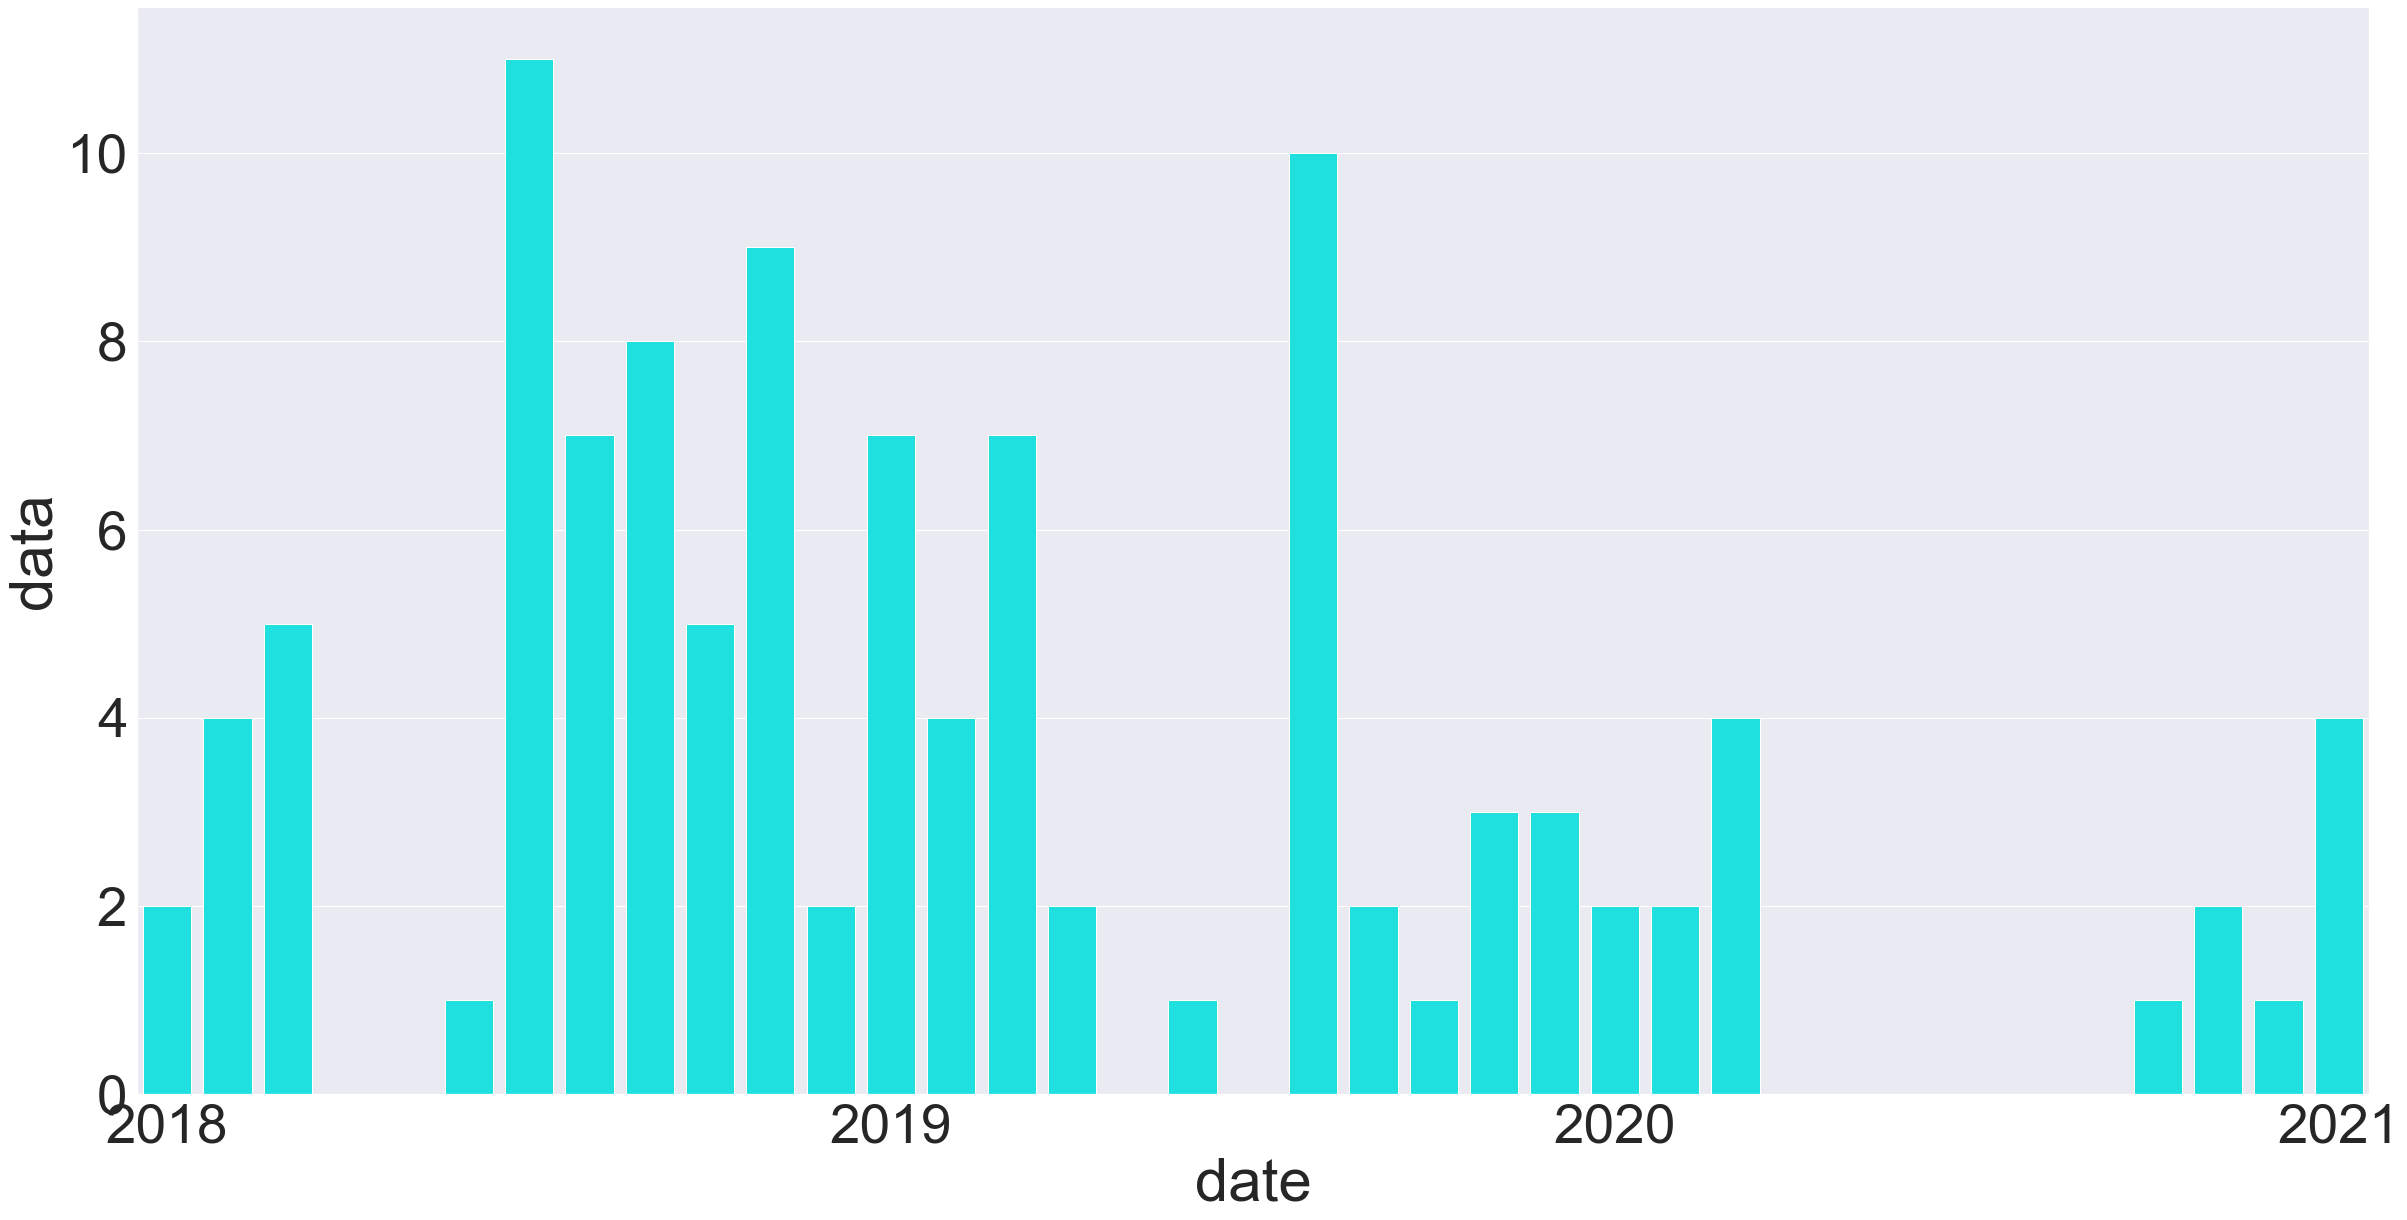

In [12]:
# Visualizing Results

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Setting Figure Size and Font Size
sns.set(rc={'figure.figsize':(40,20)})
sns.set(font_scale=5)

# Setting X Labels
x_labels = post_counts.index

# Creating Bar Plot
sns.barplot(x_labels, post_counts, color="cyan")

# Showing x-axis labels for every year
tick_positions = np.arange(len(x_labels), step=12)

# reformat date to display year onlyplt.ylabel("post counts")
plt.xticks(tick_positions, x_labels[tick_positions].strftime("%Y"))

plt.show()